In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = np.load('data.npy').reshape(1, -1).ravel()
print(data)
weightsLayer1 = np.array([np.random.normal(size=5), 
                         np.random.normal(size=5)]).T
biasesLayer1 = np.array(np.random.normal(size=5))
weightsLayer2 = np.array(np.random.normal(size=5)).T
biasLayer2 = np.random.normal()

learningRate = 0.05
errorThreshold = 0.000005

[-2.1057e-03  1.5259e-04 -2.7161e-03 -7.6294e-03 -9.2468e-03 -4.1199e-03
  3.5400e-03  6.7139e-03  3.7537e-03 -1.2207e-03 -2.1973e-03  2.5330e-03
  7.9346e-03  7.5989e-03  1.1597e-03 -5.5542e-03 -6.6223e-03 -2.0752e-03
  1.3733e-03 -1.3123e-03 -7.1106e-03 -9.0942e-03 -4.6692e-03  9.4604e-04
  1.6785e-03 -2.4719e-03 -6.2561e-03 -5.0964e-03 -6.1035e-05  3.3875e-03
  1.7090e-03 -1.7395e-03 -2.2888e-03  9.1553e-04  4.0283e-03  2.7161e-03
 -2.4414e-03 -6.6223e-03 -6.2561e-03 -2.8076e-03 -4.5776e-04 -1.9531e-03
 -5.5847e-03 -7.2327e-03 -5.2185e-03 -1.8616e-03 -5.1880e-04 -2.2888e-03
 -4.3335e-03 -3.4790e-03 -5.1880e-04  8.5449e-04 -7.0190e-04 -3.4485e-03
 -4.7607e-03 -3.3569e-03 -1.2207e-03 -1.2207e-03 -3.0212e-03 -3.7842e-03
 -2.0142e-03  2.1362e-04  3.0518e-05 -3.1128e-03 -5.8289e-03 -5.3711e-03
 -2.5024e-03  2.4414e-04  7.6294e-04 -7.3242e-04 -1.7090e-03 -9.1553e-04
 -2.7466e-04 -1.6479e-03 -3.8452e-03 -4.1504e-03 -1.8311e-03  1.4648e-03
  2.4414e-03 -1.8311e-04 -3.6316e-03 -4.1504e-03 -1

In [38]:
def logSigmoid(array):
    for i in range (0, len(array)):
        array[i] = 1 / (1 + np.exp(-array[i]))

In [39]:
meanSquaredError = 1
iterationError = np.zeros(168)
mse_iterations = []

while meanSquaredError > errorThreshold:
    for index in range(2, 170):
        p = np.array([data[index-1], data[index-2]])
        t = data[index]
        # Step 1: Forward propagate
        netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
        logSigmoid(netInputFirstLayer)
        outputFirstLayer = netInputFirstLayer

        netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
        error = t - netOutput
        iterationError[index-2] = error.ravel()[0]
        # Step 2: Backpropagate the error
        sensitivitySecondLayer = -2 * error
        functionDerivativeMatrix = np.zeros([len(outputFirstLayer),len(outputFirstLayer)])
        for i in range(0, len(outputFirstLayer)):
            functionDerivativeMatrix[i][i] = outputFirstLayer.ravel()[i] * (1 - outputFirstLayer.ravel()[i])
        sensitivityFirstLayer = (sensitivitySecondLayer) * (np.dot(weightsLayer2, functionDerivativeMatrix))
        # Step 3: Update the weights and biases
        weightsLayer1 = weightsLayer1 - learningRate * np.dot(sensitivityFirstLayer.reshape(5,1), p.reshape(1,2))
        biasesLayer1 = biasesLayer1 - learningRate * sensitivityFirstLayer
        weightsLayer2 = weightsLayer2 - learningRate * sensitivitySecondLayer * outputFirstLayer.T
        biasLayer2 = biasLayer2 - learningRate * sensitivitySecondLayer
    
    meanSquaredError = np.mean(iterationError.flatten() ** 2)
    mse_iterations.append(meanSquaredError)
    

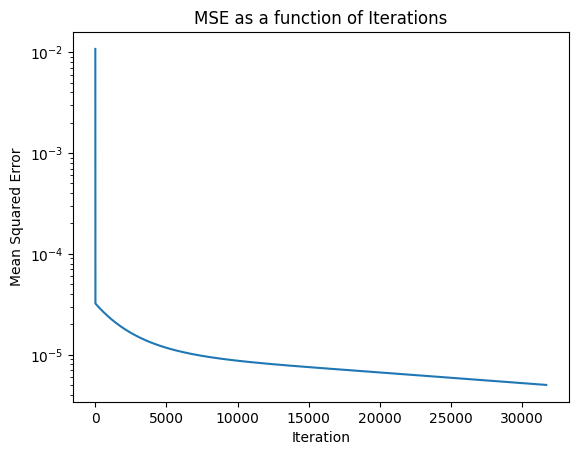

In [40]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

In [41]:
p = np.array([data[1], data[2]])
t = data[3]
netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
logSigmoid(netInputFirstLayer)
outputFirstLayer = netInputFirstLayer
netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
print("Net output from backpropagation algorithm: " + str(netOutput.ravel()[0]) + " Expected output: " + str(t))

Net output from backpropagation algorithm: -0.0015784913715823495 Expected output: -0.0076294


In [42]:
for index in range(170, 180):
    p = np.array([data[index-1], data[index-2]])
    t = data[index]
    netInputFirstLayer = np.dot(weightsLayer1, p.reshape(2,1)) + biasesLayer1.reshape(5, 1)
    logSigmoid(netInputFirstLayer)
    outputFirstLayer = netInputFirstLayer

    netOutput = np.dot(outputFirstLayer.reshape(1, 5), weightsLayer2.reshape(5, 1)) + biasLayer2 # Same as the net input to the second layer as it is a linear transfer function
    print("Net output from backpropagation algorithm: " + str(netOutput.ravel()[0]) + " Expected output: " + str(t))

Net output from backpropagation algorithm: -0.0023036529474757678 Expected output: 0.00088501
Net output from backpropagation algorithm: -0.001494744530562711 Expected output: 0.0028992
Net output from backpropagation algorithm: -0.0011973792988026616 Expected output: 0.0046692
Net output from backpropagation algorithm: -0.0008336453404905325 Expected output: 0.0065613
Net output from backpropagation algorithm: -0.0002953458268531578 Expected output: 0.0084839
Net output from backpropagation algorithm: 0.0002137068859665997 Expected output: 0.0099792
Net output from backpropagation algorithm: 0.0004304450277897026 Expected output: 0.010132
Net output from backpropagation algorithm: -6.164116028080369e-05 Expected output: 0.0087891
Net output from backpropagation algorithm: -0.000998880972290131 Expected output: 0.0063477
Net output from backpropagation algorithm: -0.0020607194057954 Expected output: 0.0039673
